In [47]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_fwf('brain_body.txt')
x = data[['Brain']]
y = data[['Body']]

In [8]:
data.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [9]:
challenge_data = pd.read_csv('challenge_dataset.txt', names=['Brain', 'Body'])
x1 = challenge_data[['Brain']]
y1 = challenge_data[['Body']]

In [11]:
challenge_data.describe()

,Brain,Body
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## Naive Linear Regression
### Training data

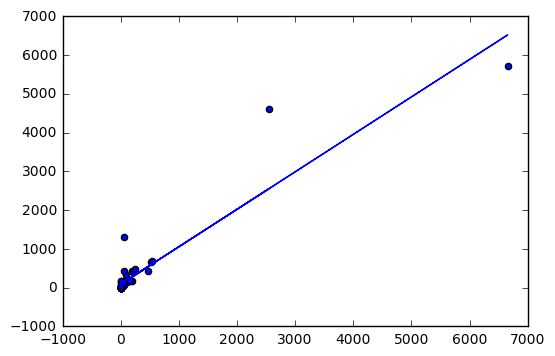

In [14]:
lr = linear_model.LinearRegression()
lr.fit(x, y)

plt.scatter(x, y)
plt.plot(x, lr.predict(x))


### Challenge data

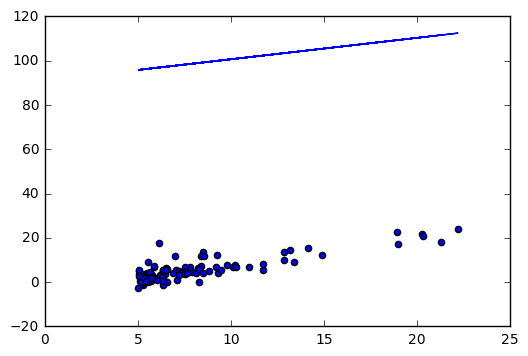

In [18]:
predictions = lr.predict(x1)
plt.scatter(x1, y1)
plt.plot(x1, predictions)

Great line, but is shifted a bit. What's the error?

In [20]:
# what's the R^2 for the fit?
print("R^2 = ", lr.score(x1, predictions) )

# error for the challenge set
error = predictions - y1
sqr_error = error * error

error.describe()

R^2 =  1.0


,Body
count,97.000000
mean,93.051678
std,3.133013
min,79.317786
25%,91.851732
50%,93.641472
75%,94.849300
max,98.875397


In [21]:
sqr_error.describe()

,Body
count,97.000000
mean,8668.329394
std,571.074813
min,6291.311123
25%,8436.740706
50%,8768.725356
75%,8996.389617
max,9776.344168


### transform data

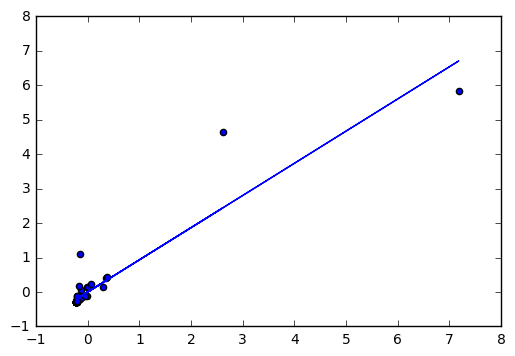

In [25]:
shifted_x = (x - x.mean()) / x.std()
shifted_y = (y - y.mean()) / y.std()
lr.fit(shifted_x, shifted_y)

plt.scatter(shifted_x, shifted_y)
plt.plot(shifted_x, lr.predict(shifted_x))

In [48]:
# training error
error = lr.predict(shifted_x) - shifted_y
sqr_error = error * error
mse = np.sum(sqr_error.values) / shifted_x.count()
print("training set MSE= ", mse.values[0])

training set MSE=  0.125284078346


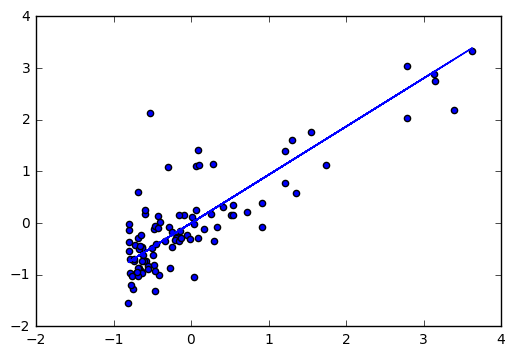

In [26]:
shifted_x1 = (x1 - x1.mean()) / x1.std()
shifted_y1 = (y1 - y1.mean()) / y1.std()

plt.scatter(shifted_x1, shifted_y1)
plt.plot(shifted_x1, lr.predict(shifted_x1))

In [49]:
# look at the error again
error = lr.predict(shifted_x1) - shifted_y1
sqr_error = error * error
mse = np.sum(sqr_error.values) / shifted_x1.count()
print("Challenge/holdout set MSE= ", mse.values[0])

Challenge/holdout set MSE=  0.304072901692
